# Data importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from math import sqrt

import pickle

%matplotlib inline

# Data Loading

In [2]:
# Specify the Excel file name or path
data = 'year1_gpa.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(data)

In [3]:
#Load 5 smples of the data
df.sample(5)

,ID,Start time,Completion time,Email,Name,Last modified time,Jamb score,English,Maths,Subject 3,...,Did you teach your peers in Year One,How many courses did you offer in Year One?,"Did you fall sick in Year One? if yes, How many times do you remember (0 if none)",What was your study mode in Year 1,Did you study the course your originally applied for?,What was your monthly allowance in Year One?,Rate the teaching style / method of the lectures received in Year One,What type of higher institution did you attend in Year One\n,What was your CGPA in Year One?,"What grading system does your school use ( if others, type numbers only)"
96,98,2023-10-04 12:33:02,2023-10-04 12:37:21,anonymous,NaN,NaN,209,C,C,C,...,"Yes, but just a few times",5 to 8,0,Full Time,Yes,31 to 50k,3,Public (Federal),3.3,5
34,36,2023-10-02 13:48:41,2023-10-02 13:54:10,anonymous,NaN,NaN,313,C,A,A,...,"No, I studied alone",9 to 12,0,Full Time,Yes,31 to 50k,3,Public (Federal),4.57,5
92,94,2023-10-04 08:54:49,2023-10-04 08:58:33,anonymous,NaN,NaN,299,C,A,A,...,"Yes, but just a few times",5 to 8,2,Full Time,Yes,21 to 30k,4,Public (Federal),4.50,5
41,43,2023-10-02 16:07:42,2023-10-02 16:10:32,anonymous,NaN,NaN,295,B,A,B,...,"No, I studied alone",5 to 8,2,Full Time,Yes,31 to 50k,4,Public (Federal),3.7,5
88,90,2023-10-04 08:14:01,2023-10-04 08:20:24,anonymous,NaN,NaN,270,B,B,B,...,"No, I didn't interact with my peers",5 to 8,1,Full Time,Yes,6 to 10k,4,Public (Federal),2.50,5


In [4]:
# changes column names to lowercase and replaces spaces with underscores
df.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'Jamb score', 'English', 'Maths', 'Subject 3',
       'Subject 4', 'Subject 5', 'What was your age in Year One', 'Gender',
       'Do you have a disability?', 'Did you attend extra tutorials? ',
       'How would you rate your participation in extracurricular activities (tech, music, partying, fellowship, etc.) in Year One?',
       'How would you rate your class attendance in Year One',
       'How well did you participate in class activities (Assignments, Asking and Answering Questions, Writing Notes....)',
       'Rate your use of extra materials for study in Year One (Youtube, Other books, others).',
       'Morning', 'Afternoon', 'Evening', 'Late Night',
       'How many days per week did you do reading on average in Year One?',
       'On average, How many hours per day was used for personal study in Year One',
       'Did you teach your peers in Year One',
       'How many courses did you

# Data Preprocessing

In [5]:
# Define a dictionary to map the long column names to short forms
column_name_mapping = {
    'ID': 'ID',
    'Start time': 'Start_time',
    'Completion time': 'Completion_time',
    'Email': 'Email',
    'Name': 'Name',
    'Last modified time': 'Last_modified_time',
    'Jamb score': 'Jamb_score',
    'English': 'English',
    'Maths': 'Maths',
    'Subject 3': 'Subject_3',
    'Subject 4': 'Subject_4',
    'Subject 5': 'Subject_5',
    'What was your age in Year One': 'Age_in_Year_One',
    'Gender': 'Gender',
    'Do you have a disability?': 'Disability',
    'Did you attend extra tutorials?\xa0': 'Extra_tutorials',
    'How would you rate your participation in extracurricular activities (tech, music, partying, fellowship, etc.) in Year One?': 'Extracurricular_participation',
    'How would you rate your class attendance in Year One': 'Class_attendance',
    'How well did you participate in class activities (Assignments, Asking and Answering Questions, Writing Notes....)': 'Class_participation',
    'Rate\xa0your use of extra materials for study in Year One (Youtube, Other books, others).': 'Use_of_extra_materials',
    'Morning': 'Morning',
    'Afternoon': 'Afternoon',
    'Evening': 'Evening',
    'Late Night': 'Late_Night',
    'How many days per week did you do reading on average in Year One?': 'Days_per_week_for_reading',
    'On average, How many hours per day was used for personal study in Year One': 'Hours_per_day_for_personal_study',
    'Did you teach your peers in Year One': 'Peer_teaching',
    'How many courses did you offer in Year One?': 'Courses_offered',
    'Did you fall sick in Year One? if yes, How many times do you remember (0 if none)': 'Sickness_count',
    'What was your study mode in Year 1': 'Study_mode',
    'Did you study the course your originally applied for?': 'Studied_original_course',
    'What was your monthly allowance in Year One?': 'Monthly_allowance',
    'Rate the teaching style / method of the lectures received in Year One': 'Teaching_style_rating',
    'What type of higher institution did you attend in Year One\n': 'Institution_type',
    'What was your CGPA in Year One?': 'CGPA',
    'What grading system does your school use ( if others, type numbers only)': 'Grading_system'
}

# Rename the columns using the dictionary
df.rename(columns=column_name_mapping, inplace=True)
df.columns

Index(['ID', 'Start_time', 'Completion_time', 'Email', 'Name',
       'Last_modified_time', 'Jamb_score', 'English', 'Maths', 'Subject_3',
       'Subject_4', 'Subject_5', 'Age_in_Year_One', 'Gender', 'Disability',
       'Extra_tutorials', 'Extracurricular_participation', 'Class_attendance',
       'Class_participation', 'Use_of_extra_materials', 'Morning', 'Afternoon',
       'Evening', 'Late_Night', 'Days_per_week_for_reading',
       'Hours_per_day_for_personal_study', 'Peer_teaching', 'Courses_offered',
       'Sickness_count', 'Study_mode', 'Studied_original_course',
       'Monthly_allowance', 'Teaching_style_rating', 'Institution_type',
       'CGPA', 'Grading_system'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   ID                                145 non-null    int64         
 1   Start_time                        145 non-null    datetime64[ns]
 2   Completion_time                   145 non-null    datetime64[ns]
 3   Email                             145 non-null    object        
 4   Name                              0 non-null      float64       
 5   Last_modified_time                0 non-null      float64       
 6   Jamb_score                        145 non-null    int64         
 7   English                           145 non-null    object        
 8   Maths                             145 non-null    object        
 9   Subject_3                         145 non-null    object        
 10  Subject_4                         145 non-null    

In [7]:
df.shape

(145, 36)

In [8]:
df.isnull().sum()

ID                                    0
Start_time                            0
Completion_time                       0
Email                                 0
Name                                145
Last_modified_time                  145
Jamb_score                            0
English                               0
Maths                                 0
Subject_3                             0
Subject_4                             0
Subject_5                             0
Age_in_Year_One                       0
Gender                                0
Disability                            0
Extra_tutorials                       0
Extracurricular_participation         0
Class_attendance                      0
Class_participation                   0
Use_of_extra_materials               10
Morning                               0
Afternoon                             0
Evening                               0
Late_Night                            0
Days_per_week_for_reading             0


In [9]:
# fix Null values

#Drop Columns with All NaN Values
df = df.drop(columns=['Name', 'Last_modified_time'])

# Fill Missing Values Based on Gender
# Calculate the mean values for 'Use_of_extra_materials' based on gender
mean_use_of_extra_materials = df.groupby('Gender')['Use_of_extra_materials'].mean()
# Fill missing values with the calculated means based on gender
df['Use_of_extra_materials'] = df.apply(lambda row: mean_use_of_extra_materials[row['Gender']] if pd.isna(row['Use_of_extra_materials']) else row['Use_of_extra_materials'], axis=1)

# Calculate the mode of "Monthly_allowance" for each gender
mode_monthly_allowance = df.groupby('Gender')['Monthly_allowance'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

# Merge the mode values back into the original DataFrame
df = pd.merge(df, mode_monthly_allowance, on='Gender', suffixes=('', '_mode'))

# Fill missing values in "Monthly_allowance" with the mode based on gender
df['Monthly_allowance'].fillna(df['Monthly_allowance_mode'], inplace=True)

# Drop the helper column "Monthly_allowance_mode"
df.drop(columns='Monthly_allowance_mode', inplace=True)

df.isnull().sum()


ID                                  0
Start_time                          0
Completion_time                     0
Email                               0
Jamb_score                          0
English                             0
Maths                               0
Subject_3                           0
Subject_4                           0
Subject_5                           0
Age_in_Year_One                     0
Gender                              0
Disability                          0
Extra_tutorials                     0
Extracurricular_participation       0
Class_attendance                    0
Class_participation                 0
Use_of_extra_materials              0
Morning                             0
Afternoon                           0
Evening                             0
Late_Night                          0
Days_per_week_for_reading           0
Hours_per_day_for_personal_study    0
Peer_teaching                       0
Courses_offered                     0
Sickness_cou

In [10]:
# Get a list of column names with data type 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Loop through the object columns and display unique values
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")


Unique values in column 'Email':
['anonymous']


Unique values in column 'English':
['B' 'C' 'A']


Unique values in column 'Maths':
['A' 'B' 'C']


Unique values in column 'Subject_3':
['A' 'B' 'C']


Unique values in column 'Subject_4':
['B' 'A' 'C']


Unique values in column 'Subject_5':
['B' 'C' 'A']


Unique values in column 'Gender':
['Male' 'Female']


Unique values in column 'Disability':
['No']


Unique values in column 'Extra_tutorials':
['Yes' 'No']


Unique values in column 'Peer_teaching':
['Yes, but just a few times' 'No, I studied alone'
 'Yes, I ran a tutorial service' "No, I didn't interact with my peers"]


Unique values in column 'Courses_offered':
['16 to 20' '13 to 16' '5 to 8' '0 to 4' '9 to 12' '20+']


Unique values in column 'Study_mode':
['Full Time' 'Part Time']


Unique values in column 'Studied_original_course':
['Yes' 'No']


Unique values in column 'Monthly_allowance':
['6 to 10k' '0 to 5k' '11 to 20k' '21 to 30k' '31 to 50k' '51 to 70k']


Unique values 

In [11]:
count_A = df[df['Grading_system'] == 'A']['Grading_system'].count()
print(f"Number of 'A' values in the 'Grading_system' column: {count_A}")


Number of 'A' values in the 'Grading_system' column: 1


In [12]:
df['Grading_system'].value_counts().reset_index()

,index,Grading_system
0,5,130
1,4,13
2,10,1
3,A,1


In [13]:
# 'CGPA' Column
# Remove non-numeric entries
df['CGPA'] = df['CGPA'].str.replace('no idea', '').str.replace(' ', '').str.replace('o', '0')

# Handle '3.o' specifically
df['CGPA'] = df['CGPA'].apply(lambda x: float(x) if x.replace('.', '', 1).isdigit() else x)

# Convert the column to numeric
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')

# Replace 215. with 2.15 in the CGPA column
df['CGPA'] = df['CGPA'].replace(215.0, 2.15)

# Handle any remaining missing values (NaN) by filling with the mean
df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)

# 'Grading_system' Column
# Remove rows where 'Grading_system' is 'A' or '10'
df = df[~df['Grading_system'].isin(['A', '10'])]


# Map the grading system values to a common scale
grading_mapping = {'5': 5, '4': 4, '10': 10}
df['Grading_system'] = df['Grading_system'].map(grading_mapping)

# Convert the column to a numeric data type if needed
df['Grading_system'] = pd.to_numeric(df['Grading_system'])

print(df['CGPA'].unique())
print('\n')
print(df['Grading_system'].unique())


[4.83    4.8     3.1     4.6     4.06    3.91    4.75    4.27    3.9
 4.89    2.67    4.4     3.8     4.51    3.82    4.54    4.73    3.76
 4.74    4.3     3.2     4.1     4.7     4.57    3.3     2.97    3.4
 3.97    4.77    3.7     4.92    4.03    4.52    4.34    4.21    3.49
 3.85    4.45    4.91    4.23    4.49    4.66    2.23    4.2     3.03
 4.00975 4.81    3.5     4.42    4.85    4.48    3.31    2.5     4.5
 3.6     3.75    4.      3.      2.6     1.9     4.264   3.46    4.61
 4.43    4.25    4.56    2.15    4.55    2.56    3.77    3.33    4.44
 4.35    3.78    4.67    3.87    3.23    4.82    4.39    2.2     3.52
 4.79    4.46    3.27    4.33    3.65    3.43   ]


[5 4]


In [14]:
# Define a dictionary to map the string values to numeric ranges
range_mapping = {
    '6 to 10k': (6000, 10000),
    '0 to 5k': (0, 5000),
    '11 to 20k': (11000, 20000),
    '21 to 30k': (21000, 30000),
    '31 to 50k': (31000, 50000),
    '51 to 70k': (51000, 70000)
}

# Define a function to calculate values from the mapping
def calculate_values(value, value_type):
    if value_type == 'avg':
        return (range_mapping[value][0] + range_mapping[value][1]) / 2
    elif value_type == 'min':
        return range_mapping[value][0]
    elif value_type == 'max':
        return range_mapping[value][1]

# Calculate the average, minimum, and maximum monthly allowance
df['Monthly_allowance_avg'] = df['Monthly_allowance'].apply(calculate_values, value_type='avg')
df['Monthly_allowance_min'] = df['Monthly_allowance'].apply(calculate_values, value_type='min')
df['Monthly_allowance_max'] = df['Monthly_allowance'].apply(calculate_values, value_type='max')

# Display the unique values in the new columns
unique_values_avg = df['Monthly_allowance_avg'].unique()
unique_values_min = df['Monthly_allowance_min'].unique()
unique_values_max = df['Monthly_allowance_max'].unique()

print(f"Unique values in column 'Monthly_allowance_avg':")
print(unique_values_avg)
print(f"Unique values in column 'Monthly_allowance_min':")
print(unique_values_min)
print(f"Unique values in column 'Monthly_allowance_max':")
print(unique_values_max)

Unique values in column 'Monthly_allowance_avg':
[ 8000.  2500. 15500. 25500. 40500. 60500.]
Unique values in column 'Monthly_allowance_min':
[ 6000     0 11000 21000 31000 51000]
Unique values in column 'Monthly_allowance_max':
[10000  5000 20000 30000 50000 70000]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 144
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   ID                                143 non-null    int64         
 1   Start_time                        143 non-null    datetime64[ns]
 2   Completion_time                   143 non-null    datetime64[ns]
 3   Email                             143 non-null    object        
 4   Jamb_score                        143 non-null    int64         
 5   English                           143 non-null    object        
 6   Maths                             143 non-null    object        
 7   Subject_3                         143 non-null    object        
 8   Subject_4                         143 non-null    object        
 9   Subject_5                         143 non-null    object        
 10  Age_in_Year_One                   143 non-null    

In [16]:
df.sample(6)

,ID,Start_time,Completion_time,Email,Jamb_score,English,Maths,Subject_3,Subject_4,Subject_5,...,Study_mode,Studied_original_course,Monthly_allowance,Teaching_style_rating,Institution_type,CGPA,Grading_system,Monthly_allowance_avg,Monthly_allowance_min,Monthly_allowance_max
76,110,2023-10-05 11:26:28,2023-10-05 11:29:45,anonymous,280,C,A,B,B,B,...,Full Time,Yes,6 to 10k,1,Public (Federal),4.26400,5,8000.0,6000,10000
54,77,2023-10-03 22:38:06,2023-10-03 22:41:05,anonymous,261,C,A,A,B,C,...,Full Time,No,0 to 5k,1,Public (Federal),4.00975,5,2500.0,0,5000
103,27,2023-10-02 13:09:25,2023-10-02 13:12:54,anonymous,256,B,B,C,C,B,...,Full Time,Yes,0 to 5k,5,Public (State),4.60000,5,2500.0,0,5000
126,107,2023-10-04 21:49:38,2023-10-04 21:53:00,anonymous,317,B,A,B,B,B,...,Full Time,Yes,31 to 50k,1,Public (Federal),4.80000,5,40500.0,31000,50000
91,141,2023-10-26 13:02:08,2023-10-26 13:05:10,anonymous,223,C,A,B,C,B,...,Full Time,No,0 to 5k,5,Public (Federal),4.45000,5,2500.0,0,5000
127,109,2023-10-05 10:25:21,2023-10-05 10:28:40,anonymous,263,C,A,B,C,A,...,Part Time,Yes,21 to 30k,5,Public (Federal),3.80000,5,25500.0,21000,30000


# EDA

In [17]:
df.columns

Index(['ID', 'Start_time', 'Completion_time', 'Email', 'Jamb_score', 'English',
       'Maths', 'Subject_3', 'Subject_4', 'Subject_5', 'Age_in_Year_One',
       'Gender', 'Disability', 'Extra_tutorials',
       'Extracurricular_participation', 'Class_attendance',
       'Class_participation', 'Use_of_extra_materials', 'Morning', 'Afternoon',
       'Evening', 'Late_Night', 'Days_per_week_for_reading',
       'Hours_per_day_for_personal_study', 'Peer_teaching', 'Courses_offered',
       'Sickness_count', 'Study_mode', 'Studied_original_course',
       'Monthly_allowance', 'Teaching_style_rating', 'Institution_type',
       'CGPA', 'Grading_system', 'Monthly_allowance_avg',
       'Monthly_allowance_min', 'Monthly_allowance_max'],
      dtype='object')

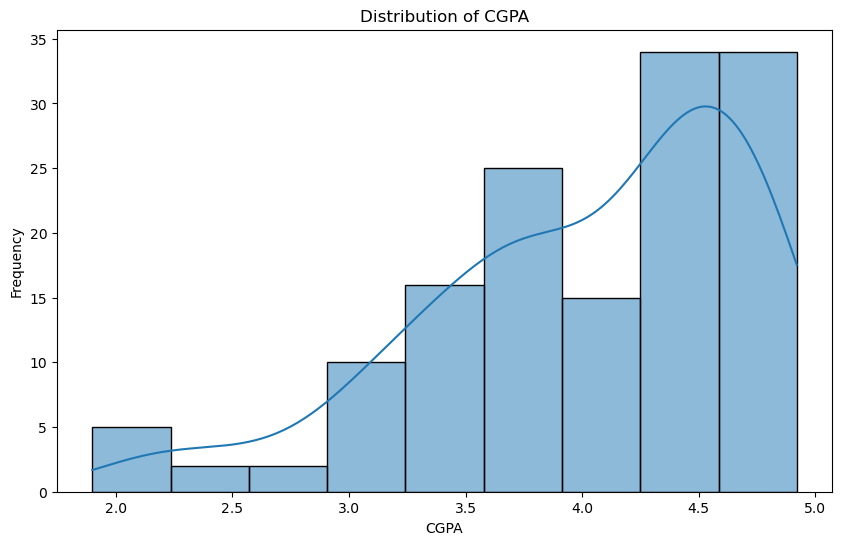

In [18]:
# Distribution of CGPA
plt.figure(figsize=(10, 6))
sns.histplot(df['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

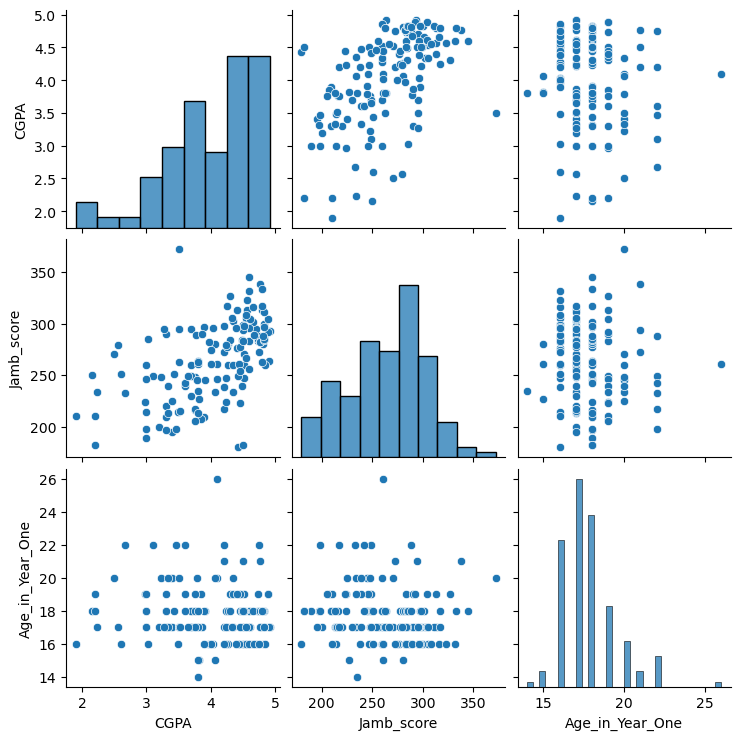

In [19]:
# Relationships between numerical variables and CGPA
sns.pairplot(df[['CGPA', 'Jamb_score', 'Age_in_Year_One']])
plt.show()


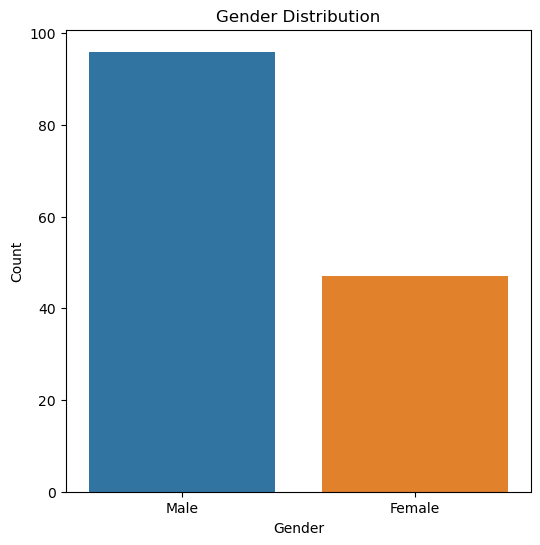

In [20]:
# Bar plot for Gender
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: >

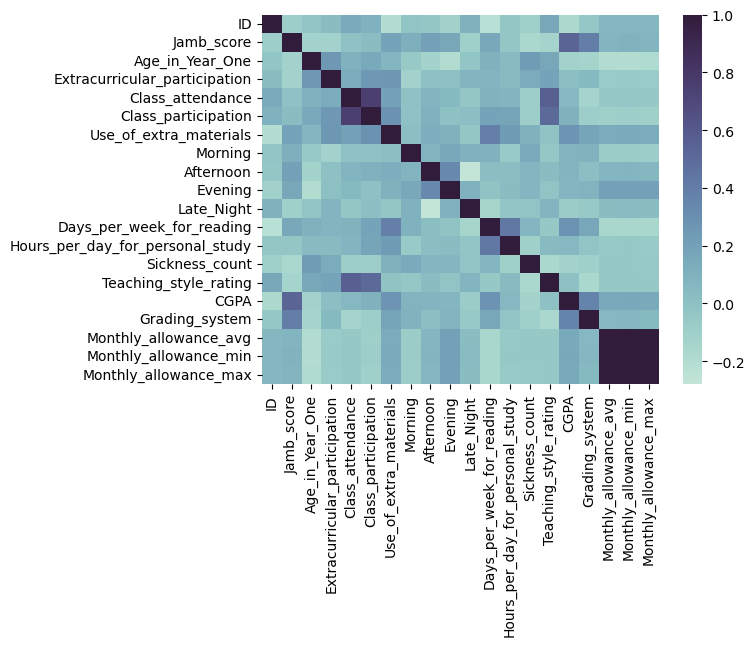

In [21]:
# correlations
sns.heatmap(df.corr(numeric_only=True),cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

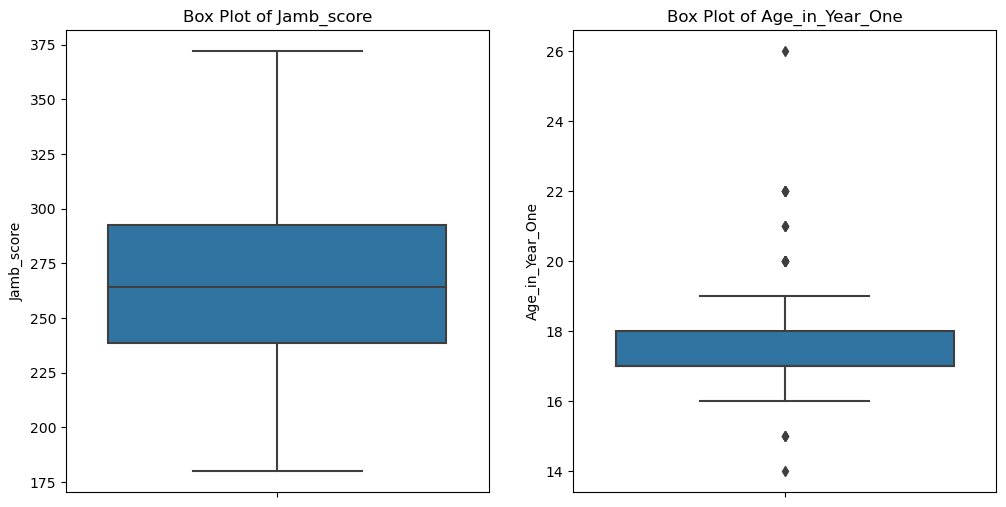

In [22]:
# Visualize numerical features for potential outliers using box plots or scatter plots
numerical_features = ['Jamb_score', 'Age_in_Year_One']

# Create subplots for box plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')
plt.show()

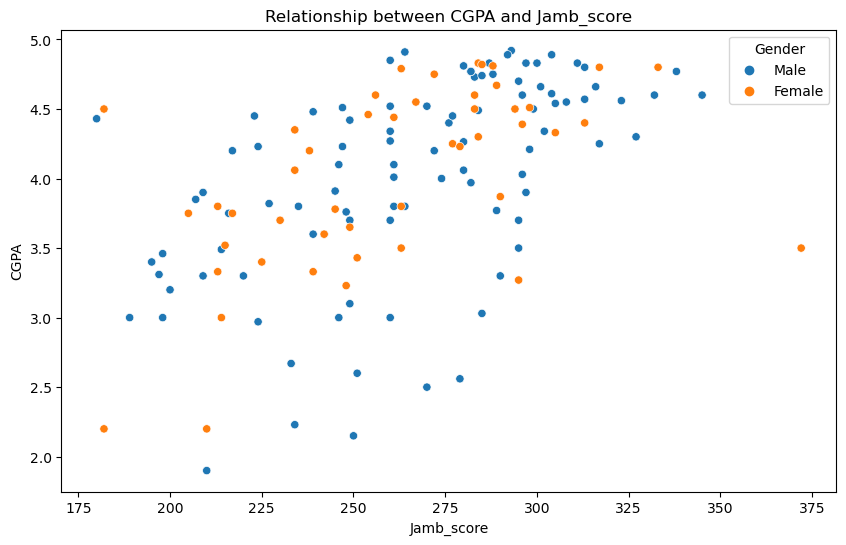

In [23]:
# Relationship between CGPA and Jamb_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Jamb_score', y='CGPA', hue='Gender')
plt.title('Relationship between CGPA and Jamb_score')
plt.xlabel('Jamb_score')
plt.ylabel('CGPA')
plt.show()

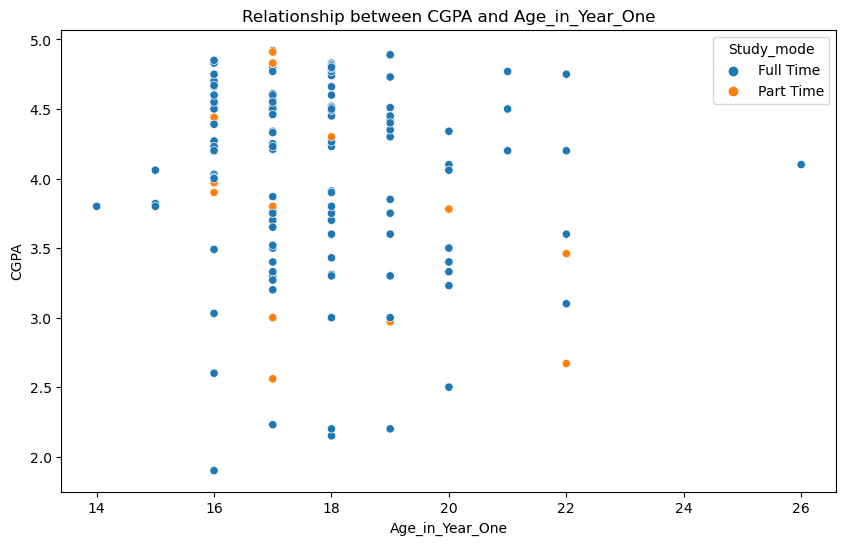

In [24]:
# Relationship between CGPA and Age_in_Year_One
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age_in_Year_One', y='CGPA', hue='Study_mode')
plt.title('Relationship between CGPA and Age_in_Year_One')
plt.xlabel('Age_in_Year_One')
plt.ylabel('CGPA')
plt.show()

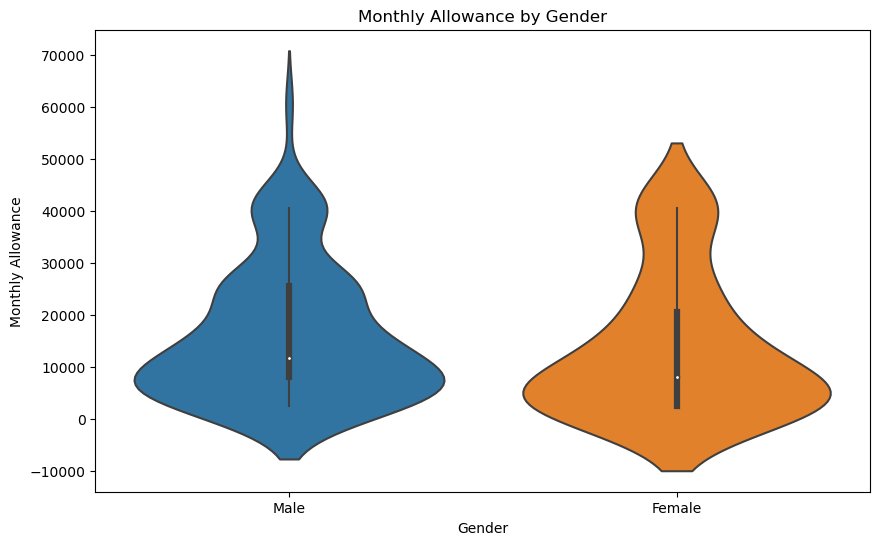

In [25]:
# Violin plot for "Monthly_allowance" by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Gender', y='Monthly_allowance_avg')
plt.title('Monthly Allowance by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Allowance')
plt.show()

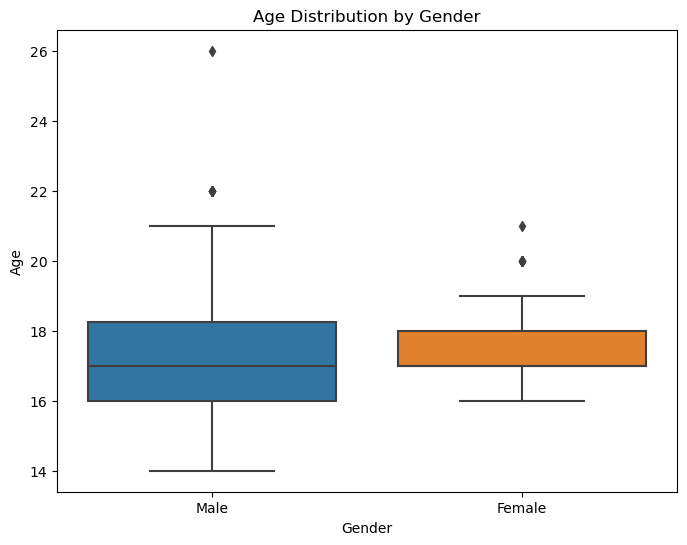

In [26]:
# Distribution of age by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Age_in_Year_One')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

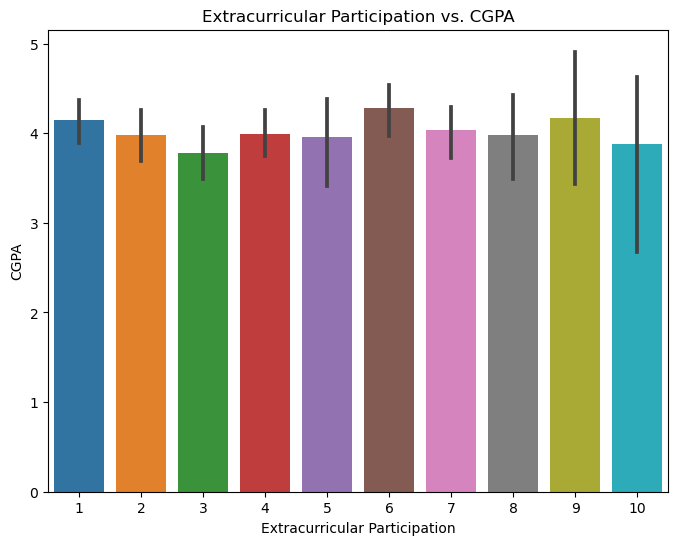

In [27]:
# Relationship between Extracurricular Participation and CGPA
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Extracurricular_participation', y='CGPA')
plt.title('Extracurricular Participation vs. CGPA')
plt.xlabel('Extracurricular Participation')
plt.ylabel('CGPA')
plt.show()


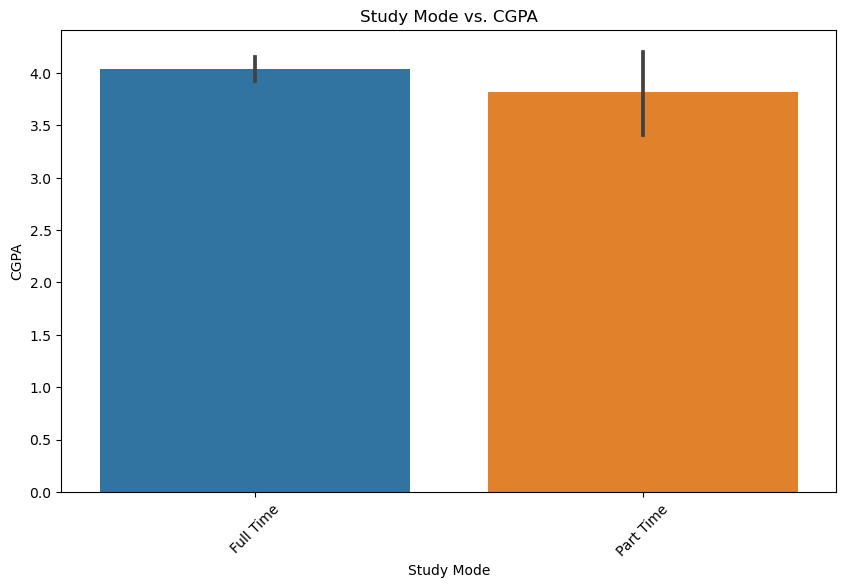

In [28]:
# Relationship between Study Mode and CGPA (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Study_mode', y='CGPA')
plt.title('Study Mode vs. CGPA')
plt.xlabel('Study Mode')
plt.ylabel('CGPA')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Data Transformation

In [29]:
label_encoder = LabelEncoder()

# mapping for English, Maths, and Subject columns
mapping_dict = {'A': 0, 'B': 1, 'C': 2}

# Map 'English', 'Maths', 'Subject_3', 'Subject_4', and 'Subject_5' columns
columns_to_map = ['English', 'Maths', 'Subject_3', 'Subject_4', 'Subject_5']
for col in columns_to_map:
    df[col] = df[col].map(mapping_dict)

# Map 'Courses_offered' to numeric values
courses_mapping = {'0 to 4': 0, '5 to 8': 1, '9 to 12': 2, '13 to 16': 3, '16 to 20': 4, '20+': 5}
df['Courses_offered'] = df['Courses_offered'].map(courses_mapping)

# Map 'Monthly_allowance' to numeric values
monthly_allowance_mapping = {'0 to 5k': 0, '6 to 10k': 1, '11 to 20k': 2, '21 to 30k': 3, '31 to 50k': 4, '51 to 70k': 5}
df['Monthly_allowance'] = df['Monthly_allowance'].map(monthly_allowance_mapping)

# Encode other categorical columns using Label Encoding
categorical_columns = ['Grading_system', 'Gender', 'Disability', 'Extra_tutorials', 'Study_mode', 'Studied_original_course', 'Institution_type', 'Peer_teaching']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])



# Feature Engineering

In [30]:
# Total study time (days per week * hours per day)
df['Total_study_time'] = df['Days_per_week_for_reading'] * df['Hours_per_day_for_personal_study']

# Data Spliting

In [31]:
df1 = df.copy()

In [32]:
# drop columns not needed for CGPA prediction
df1 = df1.drop(columns = ['ID', 'Start_time', 'Completion_time', 'Email'])

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and the target variable (y)
X = df1.drop(columns=['CGPA'])
y = df1['CGPA']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Development and Evaluation

In [34]:
# Initialize a dictionary to store model names and RMSE
model_rmse = {}

# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Machine': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging': BaggingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Gaussian Process Regressor': GaussianProcessRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    model_rmse[model_name] = rmse

# Create a DataFrame of models and RMSE
model_rmse_df = pd.DataFrame(model_rmse.items(), columns=['Model', 'RMSE'])

# Sort the DataFrame by RMSE
model_rmse_df = model_rmse_df.sort_values(by='RMSE')

model_rmse_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 28
[LightGBM] [Info] Start training from score 4.013537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

,Model,RMSE
14,LightGBM,0.497124
9,Bagging,0.532724
6,Random Forest,0.533835
8,AdaBoost,0.535433
1,Lasso,0.551969
11,Bayesian Ridge,0.554202
0,Linear Regression,0.568376
7,Gradient Boosting,0.569299
2,Ridge,0.570386
13,XGBoost,0.575411


In [35]:
# Initialize the LightGBM model hyperparameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 1000,  
    'max_depth': -1,
    'subsample': 0.8,
    'min_child_samples': 20,
    'metric': 'rmse',  
    'verbosity': -1,  
}

model = lgb.LGBMRegressor(**params)

# Train the model on the entire dataset
model.fit(X, y)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE to see the model's performance
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.04620363330825549


In [36]:
# Save the trained LightGBM model to a pickle file
model_filename = 'lightgbm_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

# Print a message to confirm that the model has been saved
print(f"LightGBM model saved as '{model_filename}'")

LightGBM model saved as 'lightgbm_model.pkl'
